# Counting Objects

In this section we will create a simple application which will count number of Tetris blocks in an image. With this example we will do the following:

* Learn how to convert an image to grayscale
* Perform Edge Detection
* Threshold a grayscale image
* Finding, counting and drawing contours
* Conducting erosion and dilation
* Masking an image

Reference: https://www.pyimagesearch.com/2018/07/19/opencv-tutorial-a-guide-to-learn-opencv/


In [8]:
import inspect
from matplotlib import pyplot as plt
import imutils
import cv2

INPUT_IMAGE = cv2.imread('./images/tetris_blocks.png')

In [9]:
def image_stats(image):
    return image.shape

#For displaying in Jupyter Notebook we use matplotlib
def display_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()

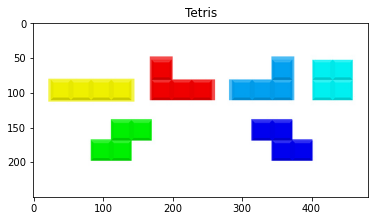

In [10]:
display_image(INPUT_IMAGE, "Tetris")

## Converting an image to grayscale.

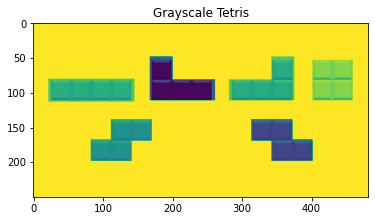

In [11]:
#Convert the image to grayscale
gray = cv2.cvtColor(INPUT_IMAGE, cv2.COLOR_BGR2GRAY)
display_image(gray, "Grayscale Tetris")

## Edge Detection

Edge detection is useful for finding boundaries of objects in an image. It is effective for segmentation purposes.

Applying edge detection to grayscale image above.

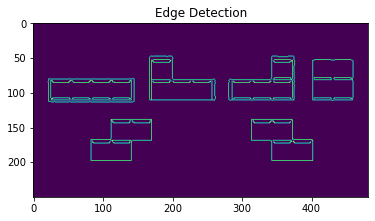

In [12]:
edged = cv2.Canny(gray, 30, 150, 3)
display_image(edged, "Edge Detection")

## Thresholding

Image thresholding is an important intermediary step for image processing pipelines. Thresholding can help us to remove lighter or darker regions and contours of the images.

Threashold the gray scale image by setting all pixel values less than 255 to 255 (white; foreground) and all pixels values >=255 to 255 (black; background), thereby segmenting the image.

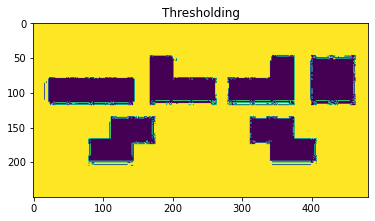

In [13]:
thresh = cv2.threshold(gray,254,255, cv2.THRESH_BINARY)[1]
display_image(thresh, "Thresholding")

## Detecting and Drawing Contours

We have 6 shape contours in this above image.

In the code cell below, we will find contours (i.e. outlines) of teh foreground objects in the threshold image.

181


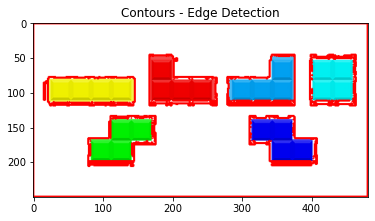

In [14]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = INPUT_IMAGE.copy()

print(len(cnts))

for c in cnts:
    cv2.drawContours(output, [c], -1, (255, 0 , 0), 2)

display_image(output, "Contours - Edge Detection")

### Erosions and Dilations 

Erosions and Dilations are used to reduce noise in binary images.

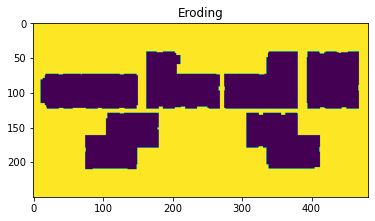

In [21]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
display_image(mask, "Eroding")